In [1]:
import pandas as pd
import sys;sys.path.append('..')
import warnings; warnings.simplefilter("ignore")
from surprise import SVD, Reader, Dataset
from collections import defaultdict
import numpy as np
import joblib

df = joblib.load('../data/explicit.pkl')
df = df[["User-ID", "ISBN", "Book-Rating"]]
df.head()

,User-ID,ISBN,Book-Rating
0,2954,0060973129,8.0
1,35704,0374157065,6.0
2,110912,0374157065,10.0
3,157969,0374157065,8.0
4,192665,0374157065,8.0


In [2]:
from util.train_test_split import split

train_df, test_df = split(df=df)

for文のタイム: 4.53
splitは44.185秒かかりました


In [3]:
#import joblib
#joblib.dump([train_df, test_df, test_user_like_books], filename="../data/train_test_split.pkl")
#train_df, test_df, test_user_like_books = joblib.load("../data/train_test_split.pkl")


In [4]:
print(f"trainデータサイズ：　{len(train_df)}")
print(f"testデータサイズ：　{len(test_df)}")

trainデータサイズ：　20194
testデータサイズ：　2286


In [5]:
# train, testデータで観測構造が違う状況を作る。
#dummy_rating = np.random.randint(1, 11, len(test_df))
#test_df["Book-Rating"] = dummy_rating


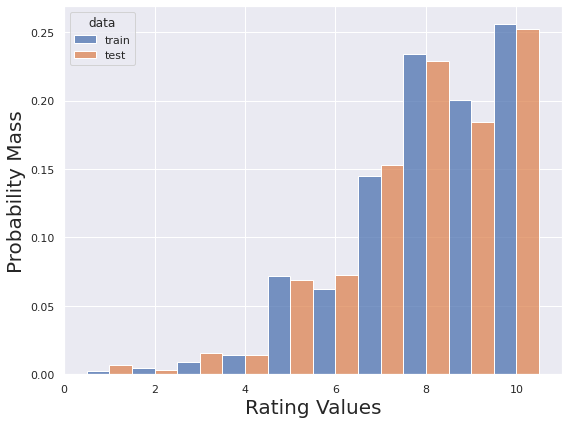

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

train_df["data"] = "train"
test_df["data"] = "test"
data_df = pd.concat([train_df, test_df])

plt.subplots(1, figsize=(8,6))
sns.histplot(
    data_df, 
    x="Book-Rating",  
    stat="probability", 
    discrete=True,
    hue="data",
    multiple="dodge",
    common_norm=False,
)

plt.xlabel('Rating Values', fontdict=dict(size=20))
plt.ylabel('Probability Mass', fontdict=dict(size=20))
plt.tight_layout()
plt.show()

In [7]:
# 少量の完全ランダムな嗜好度合いデータを用いて傾向スコアを推定する [Schnbel16]
numerator = np.unique(train_df["Book-Rating"].values, return_counts=True)[1]
numerator = numerator / numerator.sum() #P(R=r|O=1)の推定
denominator = np.unique(test_df["Book-Rating"].values, return_counts=True)[1]
denominator = denominator / denominator.sum() #(擬似的に作った真の) P(R=r)
numerator / denominator

array([0.3773398 , 1.52014035, 0.56600971, 0.98794421, 1.05126389,
       0.85651589, 0.94507449, 1.02163129, 1.08775799, 1.01450128])

In [8]:
train_df.drop(columns='data', inplace=True)
test_df.drop(columns='data', inplace=True)

In [ ]:
from MF import MF

In [14]:
model = MF(train_df, test_df)
model.set_params()
model.test()

_precision_recall_at_kは0.119秒かかりました
testは236.836秒かかりました


In [15]:
score_df = model.test_score
score_df

,precision,recall,RMSE
1,0.49,0.49,1.58


In [16]:
model.recommend()

recommendは139.786秒かかりました


In [18]:
model.save_model()

In [70]:
recommend_books = model.recommend_books

In [36]:
df = joblib.load('../data/explicit.pkl')

In [50]:
user_df = joblib.load('../data/user.pkl')
book_df = joblib.load('../data/book.pkl')

In [51]:
unique_user_ids = train_df["User-ID"].unique()
unique_book_ids = train_df["ISBN"].unique()

In [52]:
user_df = user_df[user_df["User-ID"].isin(unique_user_ids)]
user_df = user_df.reset_index(drop=True)

book_df = book_df[book_df["ISBN"].isin(unique_book_ids)]
book_df = book_df.reset_index(drop=True)

In [53]:
df = df[["User-ID", "ISBN", "Book-Rating"]]
df = df[(df["User-ID"].isin(unique_user_ids)) & (df["ISBN"].isin(unique_book_ids))]

In [66]:
user_df["mf_recommend_item"] = None

In [69]:
user_df = user_df.sort_values('User-ID')

In [75]:
recommend_books = dict(sorted(recommend_books.items(), key=lambda x:x[0]))


In [81]:
user_df["mf_recommend_item"] = list(recommend_books.values())
user_df

,User-ID,Age,city,state,country,mf_recommend_item
0,254,24.00,minneapolis,minnesota,usa,"[0877017883, 0439425220, 0140143505, 006025665..."
1,388,35.00,nashville,tennessee,usa,"[0743454529, 0877017883, 0439425220, 034533973..."
2,503,40.00,el centro,california,usa,"[0877017883, 0439425220, 0394800168, 014014350..."
3,638,20.00,san diego,california,usa,"[0060256656, 0440174643, 0877017883, 039480016..."
4,709,14.00,roanoke,virginia,usa,"[0380813815, 0060256737, 0345339711, 006025667..."
...,...,...,...,...,...,...
2092,278026,56.00,east orange,new jersey,usa,"[0877017883, 0439425220, 0394800168, 006025665..."
2093,278137,27.00,san antonio,texas,usa,"[0439425220, 0140143505, 0060256672, 087701788..."
2094,278188,34.00,lake george,new york,usa,"[0439425220, 0877017883, 0743454529, 006025667..."
2095,278356,57.00,lakeland,tennessee,usa,"[0877017883, 0439425220, 0394800168, 014014350..."


In [82]:
#joblib.dump([user_df, book_df, df], "../data/mf-api.pkl")
del user_df, book_df, df